In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_folder = 'Retail_Dataset.csv'

df = pd.read_csv(data_folder)

print(df.head())

         Date Store ID Product ID     Category Region  Inventory Level  \
0  2022-01-01     S001      P0001         Home   East              238   
1  2022-01-01     S001      P0002     Clothing  South              241   
2  2022-01-01     S001      P0003  Electronics   West              369   
3  2022-01-01     S001      P0004         Home  South              477   
4  2022-01-01     S001      P0005         Toys  South              495   

   Units Sold  Units Ordered  Demand Forecast      Price  Discount  \
0          27             33        24.613652  89.294092        10   
1          32             40        30.663866  68.948232         0   
2          28             34        26.154935  25.204127        20   
3          25             25        23.793900  73.001783         0   
4          31             38        31.436753  61.666741        20   

  Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  
0            Cloudy                  0           72.170503   

In [3]:
df.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality'],
      dtype='object')

In [4]:
df.drop(['Inventory Level', 'Units Ordered', 'Demand Forecast'], axis=1, inplace=True)

## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54800 entries, 0 to 54799
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                54800 non-null  object 
 1   Store ID            54800 non-null  object 
 2   Product ID          54800 non-null  object 
 3   Category            54800 non-null  object 
 4   Region              54800 non-null  object 
 5   Units Sold          54800 non-null  int64  
 6   Price               54800 non-null  float64
 7   Discount            54800 non-null  int64  
 8   Weather Condition   54800 non-null  object 
 9   Holiday/Promotion   54800 non-null  int64  
 10  Competitor Pricing  54800 non-null  float64
 11  Seasonality         54800 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 5.0+ MB


In [6]:
df.shape

(54800, 12)

In [7]:
df.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region', 'Units Sold',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality'],
      dtype='object')

In [8]:
onehot = pd.get_dummies(df[['Store ID', 'Product ID', 'Category', 'Region','Weather Condition', 'Seasonality']], prefix=['Store ID', 'Product ID', 'Category', 'Region','Weather Condition', 'Seasonality'], dtype=int)
df_onehot = pd.concat([df, onehot], axis=1)
df_onehot.head()

,Date,Store ID,Product ID,Category,Region,Units Sold,Price,Discount,Weather Condition,Holiday/Promotion,...,Region_North,Region_South,Region_West,Weather Condition_Cloudy,Weather Condition_Rainy,Weather Condition_Sunny,Seasonality_Autumn,Seasonality_Spring,Seasonality_Summer,Seasonality_Winter
0,2022-01-01,S001,P0001,Home,East,27,89.294092,10,Cloudy,0,...,0,0,0,1,0,0,1,0,0,0
1,2022-01-01,S001,P0002,Clothing,South,32,68.948232,0,Rainy,0,...,0,1,0,0,1,0,0,1,0,0
2,2022-01-01,S001,P0003,Electronics,West,28,25.204127,20,Cloudy,0,...,0,0,1,1,0,0,1,0,0,0
3,2022-01-01,S001,P0004,Home,South,25,73.001783,0,Cloudy,0,...,0,1,0,1,0,0,1,0,0,0
4,2022-01-01,S001,P0005,Toys,South,31,61.666741,20,Rainy,0,...,0,1,0,0,1,0,0,1,0,0


In [9]:
df_onehot.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region', 'Units Sold',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality', 'Store ID_S001', 'Store ID_S002',
       'Store ID_S003', 'Store ID_S004', 'Store ID_S005', 'Product ID_P0001',
       'Product ID_P0002', 'Product ID_P0003', 'Product ID_P0004',
       'Product ID_P0005', 'Product ID_P0006', 'Product ID_P0007',
       'Product ID_P0008', 'Product ID_P0009', 'Product ID_P0010',
       'Category_Clothing', 'Category_Electronics', 'Category_Groceries',
       'Category_Home', 'Category_Toys', 'Region_East', 'Region_North',
       'Region_South', 'Region_West', 'Weather Condition_Cloudy',
       'Weather Condition_Rainy', 'Weather Condition_Sunny',
       'Seasonality_Autumn', 'Seasonality_Spring', 'Seasonality_Summer',
       'Seasonality_Winter'],
      dtype='object')

In [10]:
df_onehot['Date'] = pd.to_datetime(df_onehot['Date'])
print("Earliest date in the dataset:", df_onehot['Date'].min())
print("Latest date in the dataset:", df_onehot['Date'].max())

Earliest date in the dataset: 2022-01-01 00:00:00
Latest date in the dataset: 2024-12-31 00:00:00


In [11]:

df_onehot['Sales'] = df_onehot['Units Sold'] * df_onehot['Price']*(1 - df_onehot['Discount']/100) 
df_onehot.head()

,Date,Store ID,Product ID,Category,Region,Units Sold,Price,Discount,Weather Condition,Holiday/Promotion,...,Region_South,Region_West,Weather Condition_Cloudy,Weather Condition_Rainy,Weather Condition_Sunny,Seasonality_Autumn,Seasonality_Spring,Seasonality_Summer,Seasonality_Winter,Sales
0,2022-01-01,S001,P0001,Home,East,27,89.294092,10,Cloudy,0,...,0,0,1,0,0,1,0,0,0,2169.846427
1,2022-01-01,S001,P0002,Clothing,South,32,68.948232,0,Rainy,0,...,1,0,0,1,0,0,1,0,0,2206.343410
2,2022-01-01,S001,P0003,Electronics,West,28,25.204127,20,Cloudy,0,...,0,1,1,0,0,1,0,0,0,564.572455
3,2022-01-01,S001,P0004,Home,South,25,73.001783,0,Cloudy,0,...,1,0,1,0,0,1,0,0,0,1825.044569
4,2022-01-01,S001,P0005,Toys,South,31,61.666741,20,Rainy,0,...,1,0,0,1,0,0,1,0,0,1529.335172


In [12]:
df_onehot.describe()

,Date,Units Sold,Price,Discount,Holiday/Promotion,Competitor Pricing,Store ID_S001,Store ID_S002,Store ID_S003,Store ID_S004,...,Region_South,Region_West,Weather Condition_Cloudy,Weather Condition_Rainy,Weather Condition_Sunny,Seasonality_Autumn,Seasonality_Spring,Seasonality_Summer,Seasonality_Winter,Sales
count,54800,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,...,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000
mean,2023-07-02 12:00:00,34.497354,60.139691,10.887226,0.251131,60.119796,0.200000,0.200000,0.200000,0.200000,...,0.249416,0.249526,0.334343,0.332391,0.333266,0.246095,0.251624,0.250620,0.251661,1833.930021
min,2022-01-01 00:00:00,8.000000,20.000184,0.000000,0.000000,16.144335,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,195.013768
25%,2022-10-01 18:00:00,26.000000,40.185353,0.000000,0.000000,39.547816,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1100.527571
50%,2023-07-02 12:00:00,32.000000,60.200450,10.000000,0.000000,59.221334,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1668.634825
75%,2024-04-01 06:00:00,41.000000,80.252158,20.000000,1.000000,79.169210,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2358.720088
max,2024-12-31 00:00:00,120.000000,99.999801,30.000000,1.000000,119.749116,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8421.070208
std,NaN,12.102820,23.096959,9.244991,0.433668,24.269064,0.400004,0.400004,0.400004,0.400004,...,0.432679,0.432742,0.471765,0.471074,0.471385,0.430738,0.433950,0.433374,0.433971,969.597968


## sales heatmap

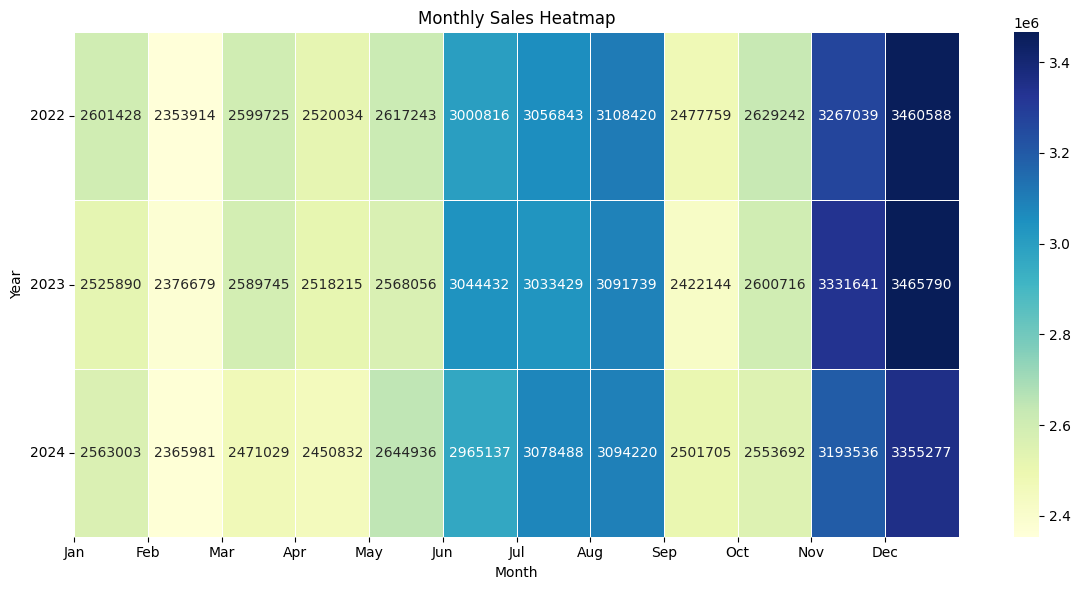

In [13]:
# Step 1: Create 'Year' and 'Month' columns
df_onehot['Year'] = df_onehot['Date'].dt.year
df_onehot['Month'] = df_onehot['Date'].dt.month

# Step 2: Create a pivot table of total revenue per (Year, Month)
pivot = df_onehot.pivot_table(values='Sales', index='Year', columns='Month', aggfunc='sum')

# Step 3: Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.title("Monthly Sales Heatmap")
plt.xlabel("Month")
plt.ylabel("Year")
plt.xticks(ticks=range(12), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
], rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Correlation 

In [14]:
df_onehot['Month'] = df_onehot['Date'].dt.month


In [15]:
df_corr = df_onehot[['Month', 'Holiday/Promotion', 
        'Store ID_S001', 'Store ID_S002',
       'Store ID_S003', 'Store ID_S004', 'Store ID_S005', 'Product ID_P0001',
       'Product ID_P0002', 'Product ID_P0003', 'Product ID_P0004',
       'Product ID_P0005', 'Product ID_P0006', 'Product ID_P0007',
       'Product ID_P0008', 'Product ID_P0009', 'Product ID_P0010',
       'Category_Clothing', 'Category_Electronics', 'Category_Groceries',
       'Category_Home', 'Category_Toys', 'Region_East', 'Region_North',
       'Region_South', 'Region_West', 'Weather Condition_Cloudy',
       'Weather Condition_Rainy', 'Weather Condition_Sunny',
       'Seasonality_Autumn', 'Seasonality_Spring', 'Seasonality_Summer',
       'Seasonality_Winter', 'Sales']]

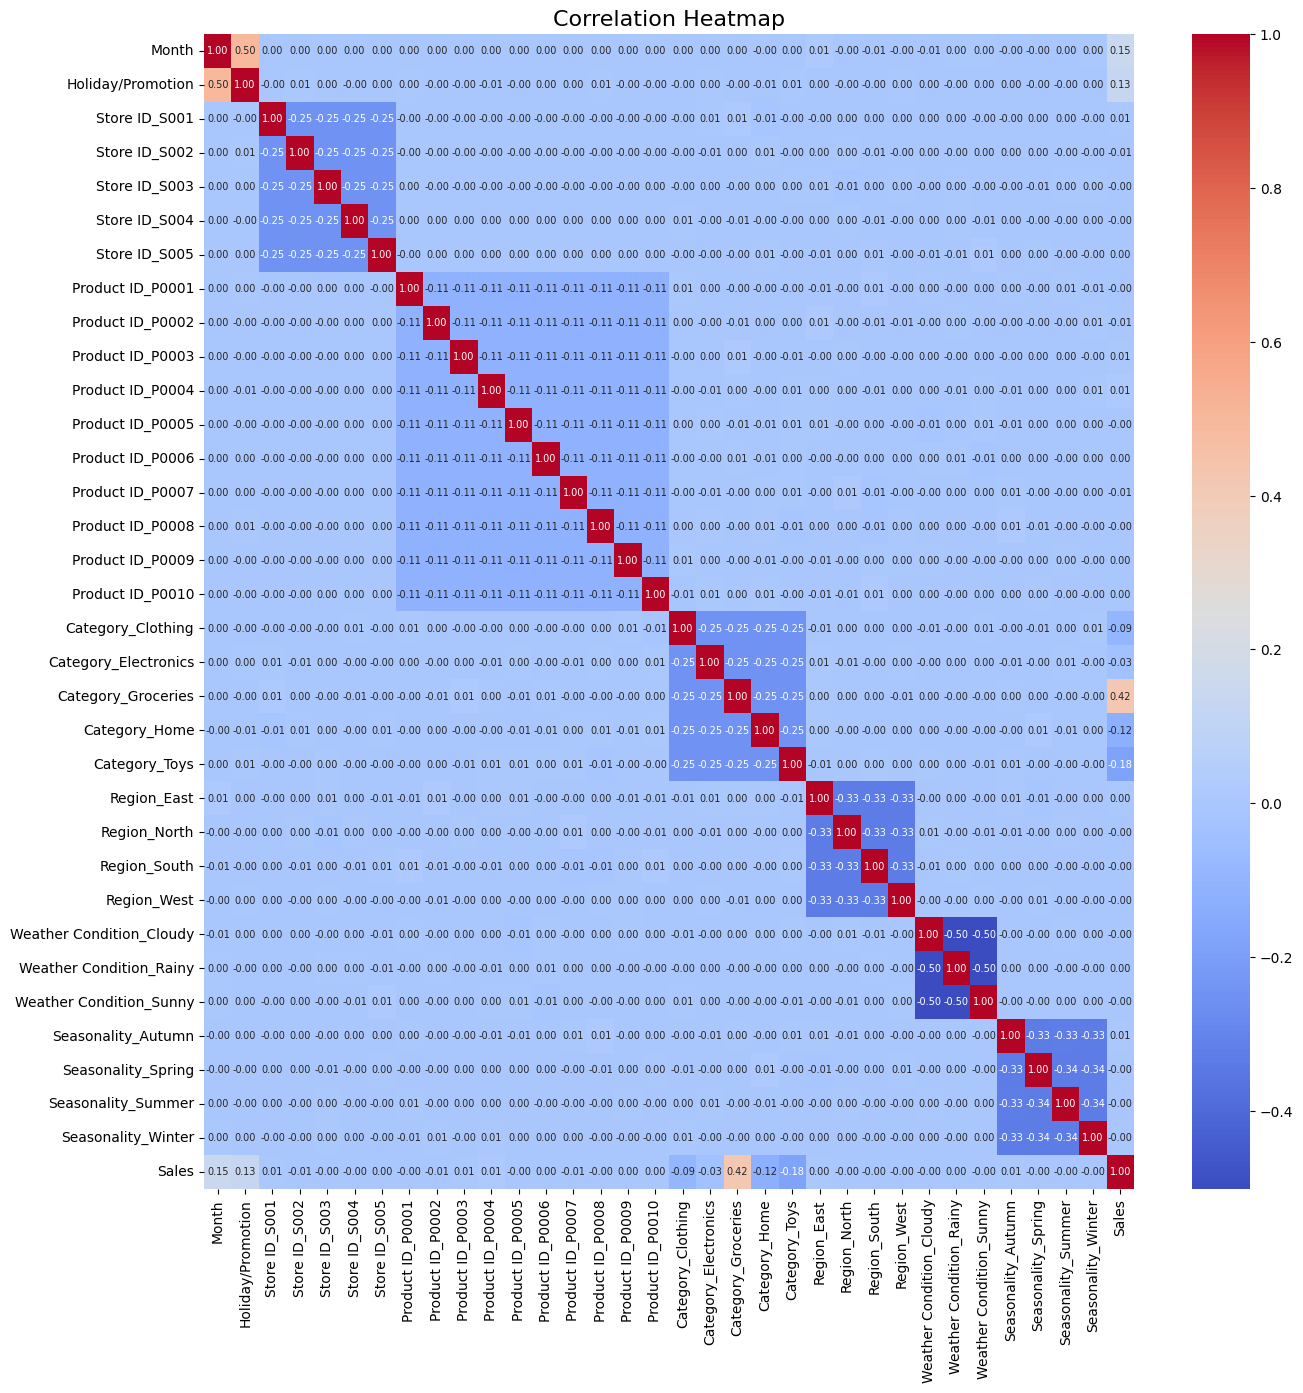

In [16]:
corr = df_corr.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 7})
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Sales by Month

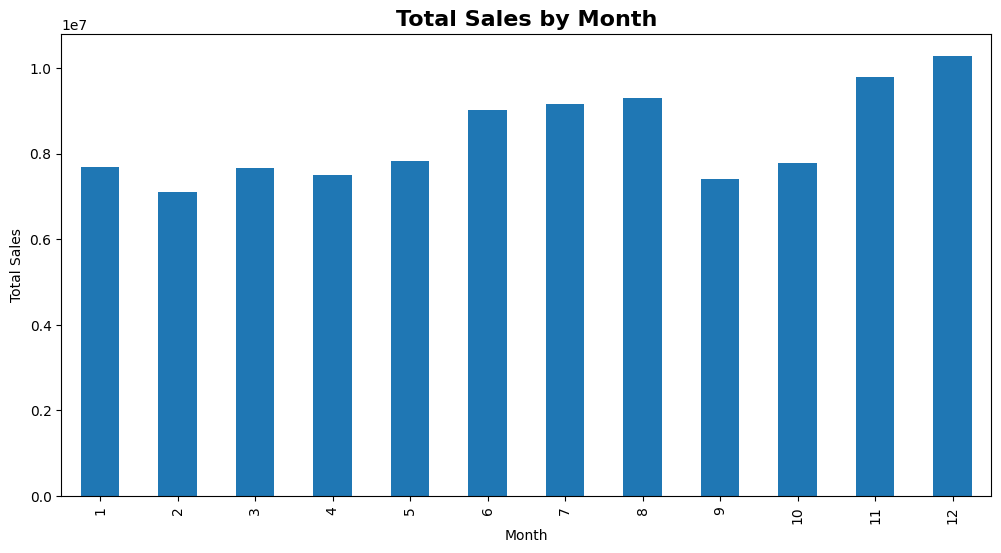

In [17]:
df_onehot.groupby('Month')['Sales'].sum().plot(kind='bar', figsize=(12, 6))
plt.title('Total Sales by Month', fontsize=16, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.style.use('ggplot')
plt.show()


## Holiday/Promotion

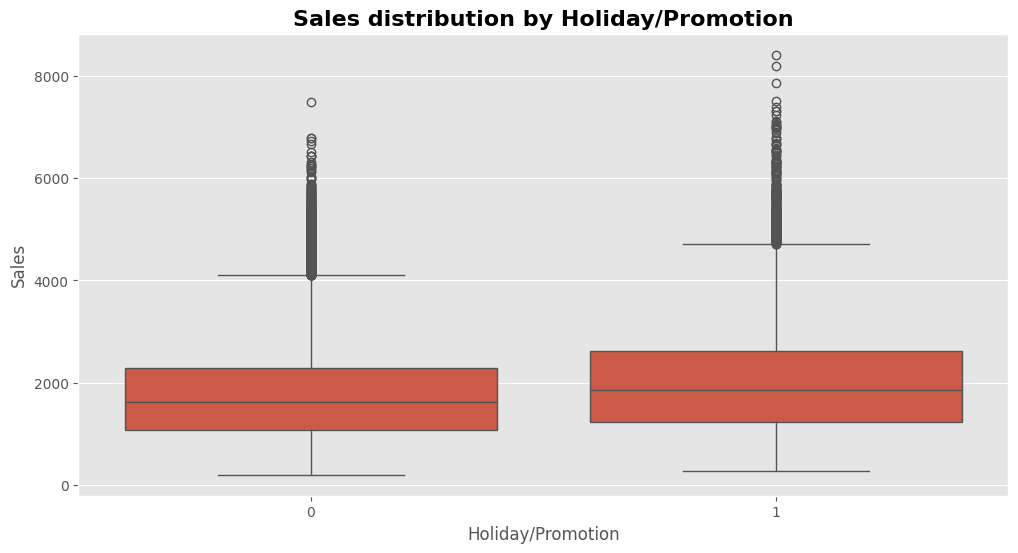

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Holiday/Promotion', y='Sales', data=df_onehot)
plt.title('Sales distribution by Holiday/Promotion', fontsize=16, fontweight='bold')
plt.xlabel('Holiday/Promotion')
plt.ylabel('Sales')
plt.style.use('ggplot')
plt.show()

## Sales by Catogories

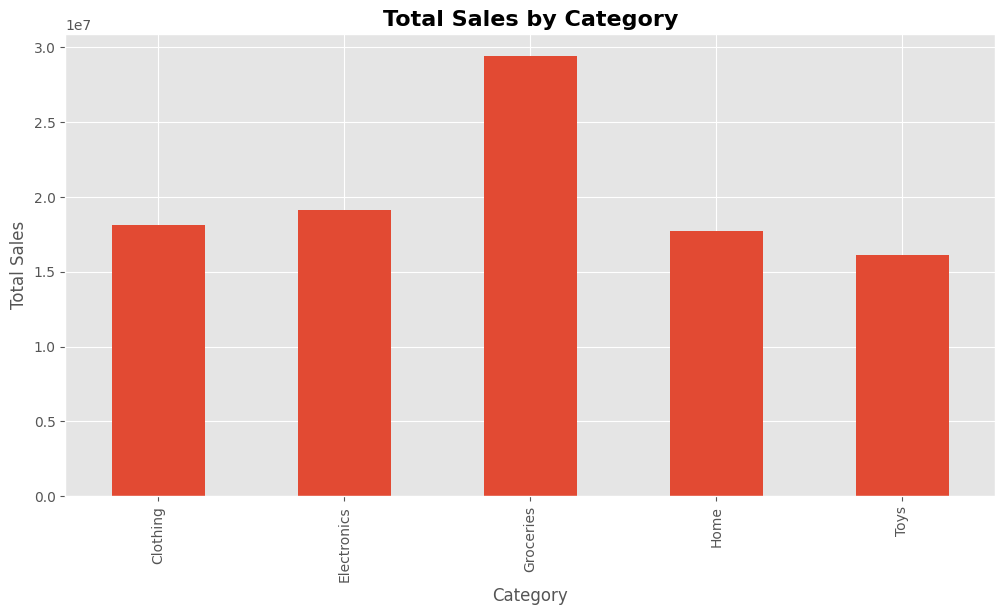

In [19]:
df_onehot.groupby('Category')['Sales'].sum().plot(kind='bar', figsize=(12, 6))
plt.title('Total Sales by Category', fontsize=16, fontweight='bold')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.style.use('ggplot')
plt.show()

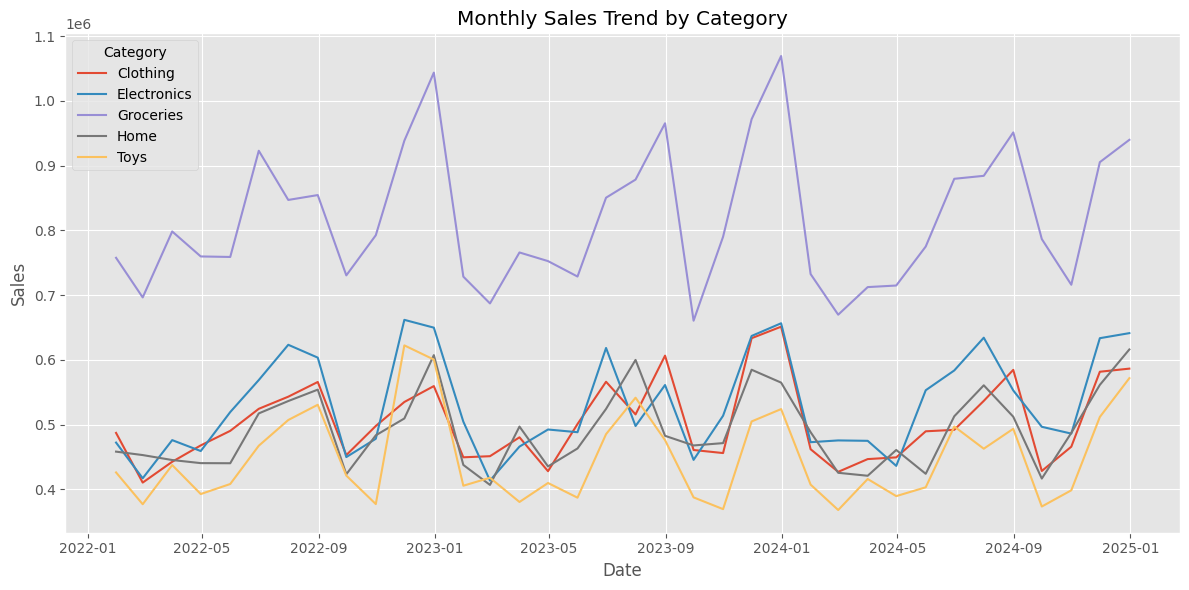

In [20]:
df_monthly_cat = df_onehot.groupby(['Category', pd.Grouper(key='Date', freq='M')])['Sales'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
for category in df_monthly_cat['Category'].unique():
    category_data = df_monthly_cat[df_monthly_cat['Category'] == category]
    plt.plot(category_data['Date'], category_data['Sales'], label=category)

plt.title('Monthly Sales Trend by Category')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

In [21]:
df_monthly_cat

,Category,Date,Sales
0,Clothing,2022-01-31,487179.925802
1,Clothing,2022-02-28,410435.993048
2,Clothing,2022-03-31,442591.656274
3,Clothing,2022-04-30,467883.997339
4,Clothing,2022-05-31,490360.678714
...,...,...,...
175,Toys,2024-08-31,493530.231583
176,Toys,2024-09-30,373487.682971
177,Toys,2024-10-31,398529.407503
178,Toys,2024-11-30,511773.425996


# Time Series

In [22]:
# count daily sales
daily_sales = df_onehot.groupby(['Date'])['Sales'].sum().reset_index()
daily_sales

,Date,Sales
0,2022-01-01,87373.886613
1,2022-01-02,82405.497598
2,2022-01-03,88776.117124
3,2022-01-04,83946.655615
4,2022-01-05,84210.831506
...,...,...
1091,2024-12-27,113218.584344
1092,2024-12-28,110148.677564
1093,2024-12-29,105954.668841
1094,2024-12-30,95548.937398


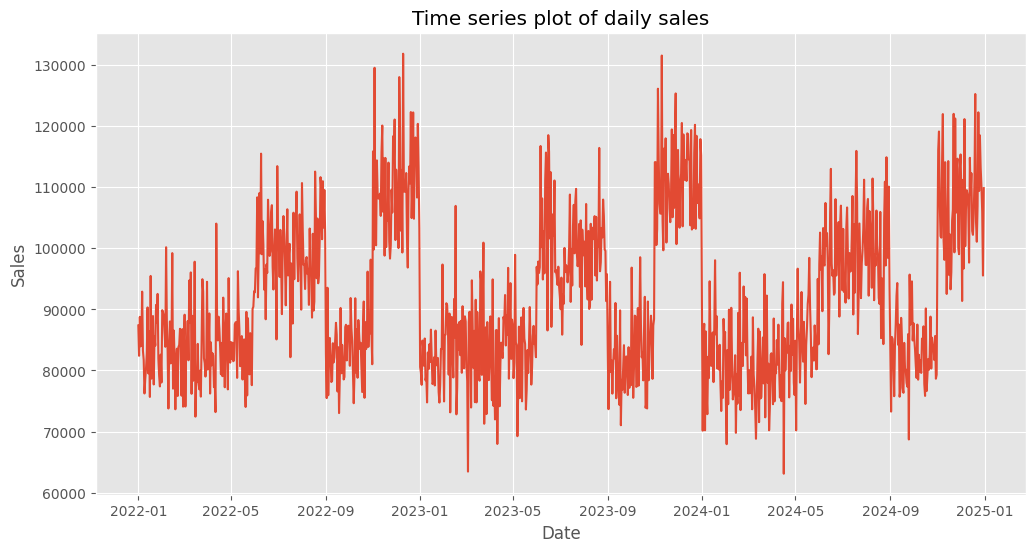

In [23]:
# Plot daily sales
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Sales'])
plt.title('Time series plot of daily sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [24]:
# count Monthly sales
monthly_sales = df_onehot.groupby(pd.Grouper(key='Date', freq='M'))['Sales'].sum().reset_index()
monthly_sales['Date'] = monthly_sales['Date'].dt.strftime('%Y-%m')
monthly_sales.head()

,Date,Sales
0,2022-01,2.601428e+06
1,2022-02,2.353914e+06
2,2022-03,2.599725e+06
3,2022-04,2.520034e+06
4,2022-05,2.617243e+06


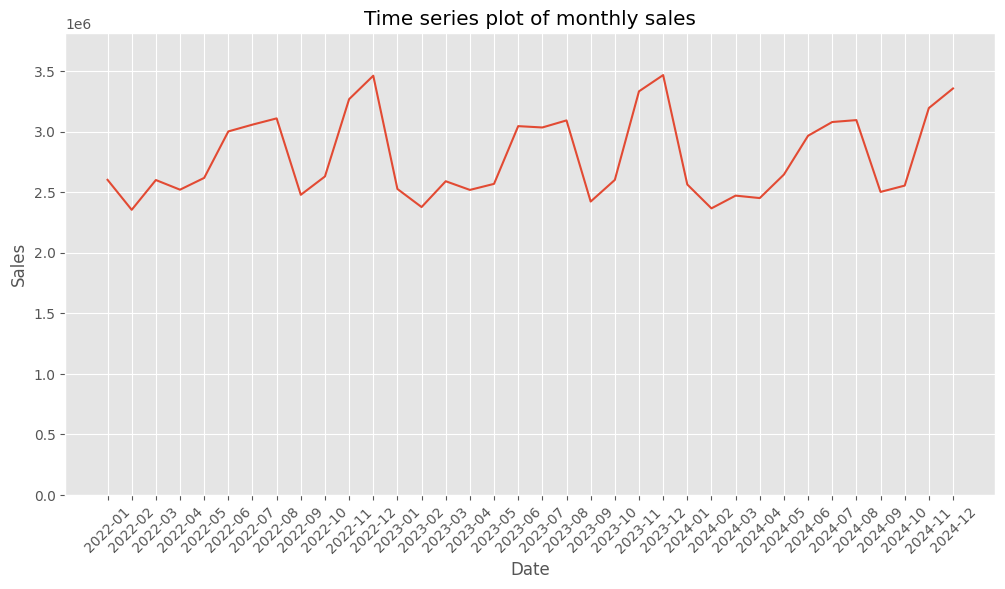

In [25]:
# Plot monthly sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Date'], monthly_sales['Sales'])
plt.title('Time series plot of monthly sales')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales')
plt.ylim(0, monthly_sales['Sales'].max() * 1.1)  # Adjust y-axis limit for better visibility
plt.xticks(rotation=45)
plt.show()

# Forecasting

In [26]:
# %pip install pmdarima

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima #auto_arima is used to find the best ARIMA parameters automatically
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from math import sqrt


## ARIMA
### Auto Regressive Integrated Moving Average
auto regression, where we forcast future values using linear combination of the previous observed values.

c:\Users\Ting\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Ting\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Ting\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2024-10-01    2.559323e+06
2024-11-01    2.590209e+06
2024-12-01    2.606765e+06
Freq: MS, Name: predicted_mean, dtype: float64

key evaluation metrics ：
🔹 MAPE：13.81%
🔹 RMSE：555,069


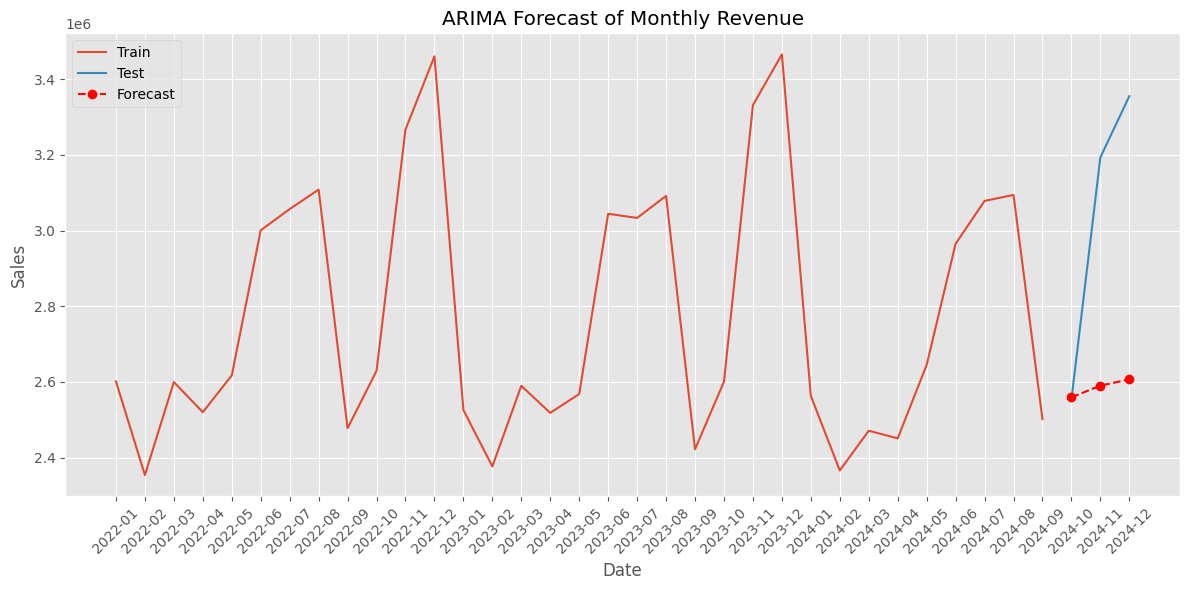

In [27]:
monthly_sales.set_index('Date', inplace=True)

train = monthly_sales[:-3]
test = monthly_sales[-3:]

ARIMA_Model = ARIMA(train, order=(1, 1, 1))
fitted_ARIMA_model = ARIMA_Model.fit()

ARIMA_forecast = fitted_ARIMA_model.forecast(steps=3)

print(ARIMA_forecast)

# key evaluation metrics 
mape = mean_absolute_percentage_error(test, ARIMA_forecast)
rmse = sqrt(mean_squared_error(test, ARIMA_forecast))

print(f"\nkey evaluation metrics ：")
print(f"🔹 MAPE：{mape:.2%}")
print(f"🔹 RMSE：{rmse:,.0f}")

# Plot results
plt.figure(figsize=(12, 6))
# Convert index to string for consistent plotting
train_x = train.index.astype(str)
test_x = test.index.astype(str)

plt.plot(train_x, train['Sales'], label='Train')
plt.plot(test_x, test['Sales'], label='Test')
plt.plot(test_x, ARIMA_forecast, label='Forecast', color='red', linestyle='--', marker='o')
plt.title('ARIMA Forecast of Monthly Revenue')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



## SARIMA

c:\Users\Ting\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Ting\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Ting\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


2024-10-01    2.600035e+06
2024-11-01    3.349400e+06
2024-12-01    3.477715e+06
Freq: MS, Name: predicted_mean, dtype: float64

key evaluation metrics ：
🔹 MAPE：3.45%
🔹 RMSE：117,519


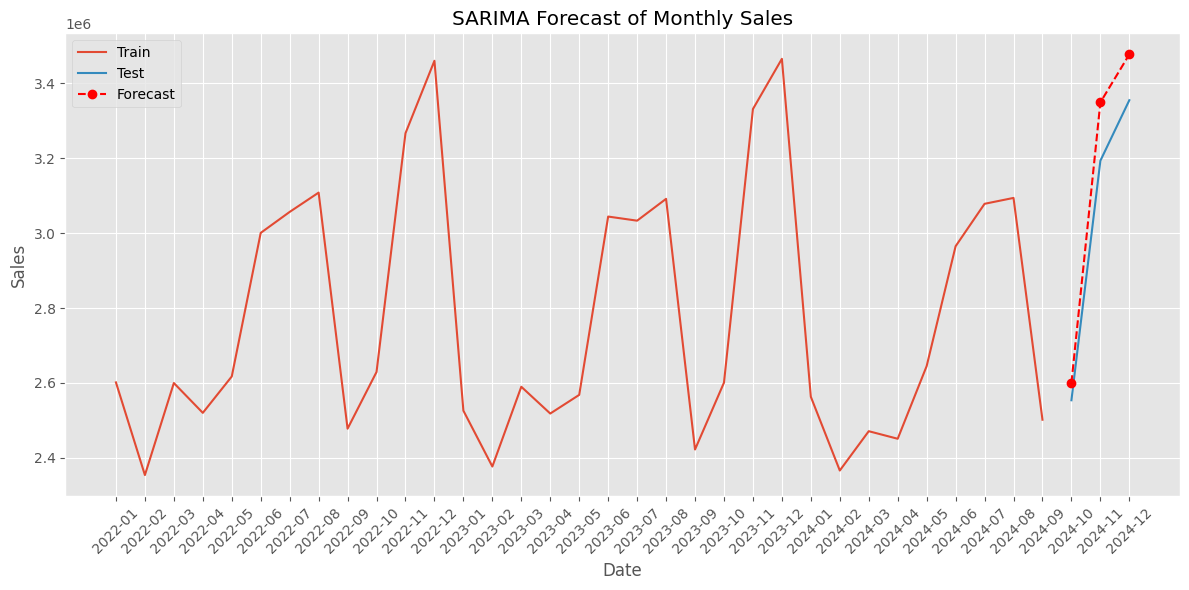

In [28]:
SARIMA_Model = SARIMAX(train, 
                    order=(1, 1, 1), 
                    seasonal_order=(1, 1, 1, 12), 
                    enforce_stationarity=False, 
                    enforce_invertibility=False)
fitted_SARIMA_model = SARIMA_Model.fit()

SARIMA_forecast = fitted_SARIMA_model.forecast(steps=3)

# key evaluation metrics
mape = mean_absolute_percentage_error(test, SARIMA_forecast)
rmse = sqrt(mean_squared_error(test, SARIMA_forecast))

# Print forecast
print(SARIMA_forecast)

print(f"\nkey evaluation metrics ：")
print(f"🔹 MAPE：{mape:.2%}")
print(f"🔹 RMSE：{rmse:,.0f}")

# Plot results
plt.figure(figsize=(12, 6))

plt.plot(train_x, train['Sales'], label='Train')
plt.plot(test_x, test['Sales'], label='Test')
plt.plot(test_x, SARIMA_forecast, label='Forecast', color='red', linestyle='--', marker='o')
plt.title('SARIMA Forecast of Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Auto ARIMA

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=531.434, Time=0.56 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=520.499, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=522.536, Time=0.28 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=522.875, Time=0.08 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=521.434, Time=0.01 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=522.493, Time=0.11 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=522.493, Time=0.05 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=524.493, Time=0.17 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=520.587, Time=0.04 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=520.953, Time=0.06 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=522.347, Time=0.19 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12] intercept
Total fit time: 1.589 seconds
Best auto ARIMA model:                                 SARIMAX Results                                 
Dep. Variable:                        y   No. Obs

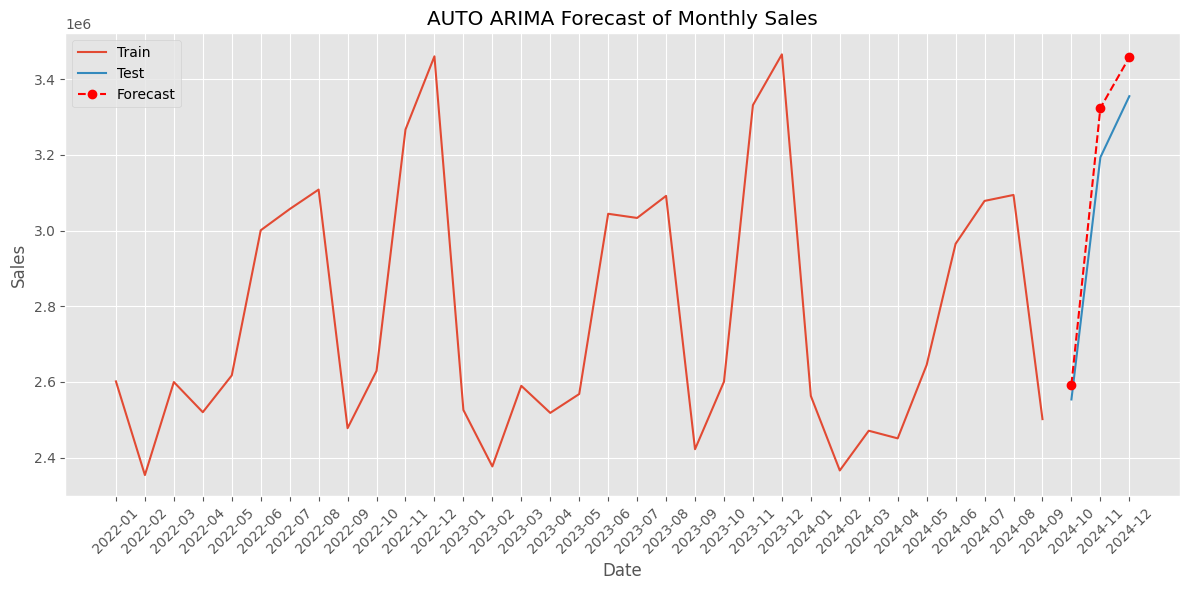

In [29]:
# auto arima model
auto_arima_model = auto_arima(train,
                    seasonal=True,
                    m=12,
                    stepwise=True,
                    trace=True,
                    suppress_warnings=True,
                    error_action='ignore')

print("Best auto ARIMA model:", auto_arima_model.summary())

# predict next 3 months
auto_arima_forecast = auto_arima_model.predict(n_periods=3)

print(auto_arima_forecast)

# key evaluation metrics
mape = mean_absolute_percentage_error(test, auto_arima_forecast)
rmse = sqrt(mean_squared_error(test, auto_arima_forecast))

print(f"\nkey evaluation metrics ：")
print(f"🔹 MAPE：{mape:.2%}")
print(f"🔹 RMSE：{rmse:,.0f}")

# Plot results
plt.figure(figsize=(12, 6))

plt.plot(train_x, train['Sales'], label='Train')
plt.plot(test_x, test['Sales'], label='Test')
plt.plot(test_x, auto_arima_forecast, label='Forecast', color='red', linestyle='--', marker='o')
plt.title('AUTO ARIMA Forecast of Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



In [30]:
monthly_sales['Sales'].mean()

2791649.032562221

# Final Prediction:
Predict the next three months

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=609.865, Time=0.98 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=599.856, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=602.502, Time=0.13 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=602.653, Time=0.37 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=602.443, Time=0.03 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=601.525, Time=0.07 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=601.527, Time=0.14 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=603.449, Time=0.30 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=600.958, Time=0.03 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=601.222, Time=0.05 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=603.040, Time=0.11 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12] intercept
Total fit time: 2.289 seconds
Final Auto ARIMA model summary:

                                SARIMAX Results                                 
Dep. Variable:                        y

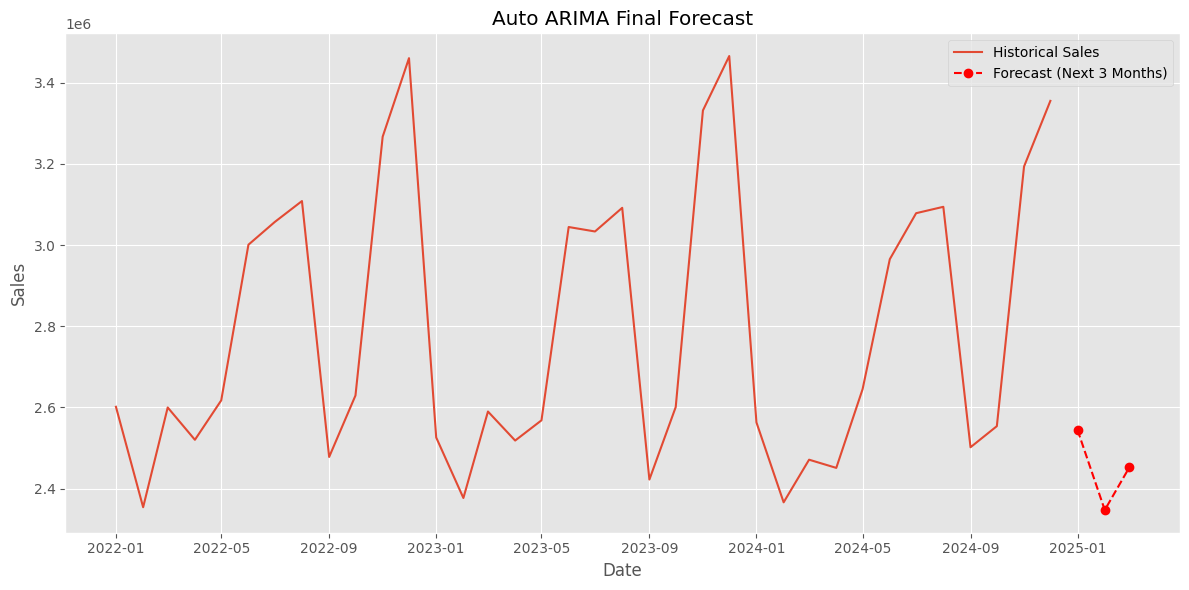

In [31]:
# Re-train Auto ARIMA on the full dataset
final_model = auto_arima(monthly_sales,
                         seasonal=True,
                         m=12,
                         stepwise=True,
                         trace=True,
                         suppress_warnings=True,
                         error_action='ignore')

print("Final Auto ARIMA model summary:\n")
print(final_model.summary())

# Forecast next 3 months
future_forecast = final_model.predict(n_periods=3)

# Generate future date index
last_date = monthly_sales.index[-1]
last_date_dt = pd.to_datetime(last_date)
future_index = pd.date_range(start=last_date_dt + pd.offsets.MonthBegin(1), periods=3, freq='MS')

# Build DataFrame for forecast
future_df = pd.DataFrame({'Date': future_index, 'Forecasted Sales': future_forecast})
future_df.set_index('Date', inplace=True)

# Display forecast
print("\n📈 Forecasted Sales for the Next 3 Months:")
print(future_df)

# Ensure timezone consistency
monthly_sales.index = pd.to_datetime(monthly_sales.index).tz_localize(None)
future_df.index = pd.to_datetime(future_df.index).tz_localize(None)

# Plot historical + forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['Sales'], label='Historical Sales')
plt.plot(future_df.index, future_df['Forecasted Sales'], label='Forecast (Next 3 Months)', color='red', linestyle='--', marker='o')
plt.title('Auto ARIMA Final Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()